# Plots for alpha, grad_norm, input_output_cossim, drop_ppl

In [2]:
from pylab import plt
import pandas as pd
import numpy as np
import seaborn as sns
import torch

In [3]:
base_folder = "../results_with_alpha"
ww = torch.load(f"{base_folder}/cleaned_data.pt")
ppl = torch.load(f"{base_folder}/ppl_data_cleaned.pt")
gn = torch.load(f"{base_folder}/grad_norm_data_cleaned.pt")


## alpha

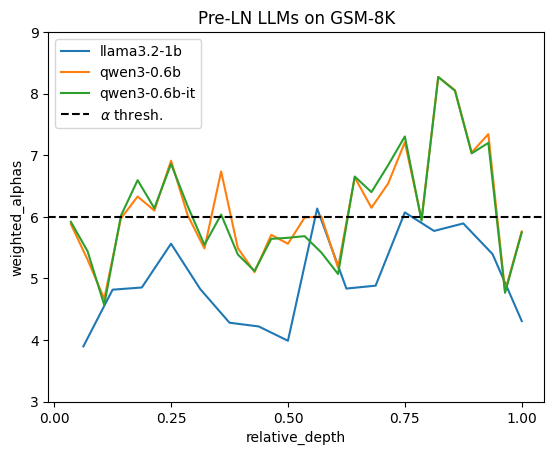

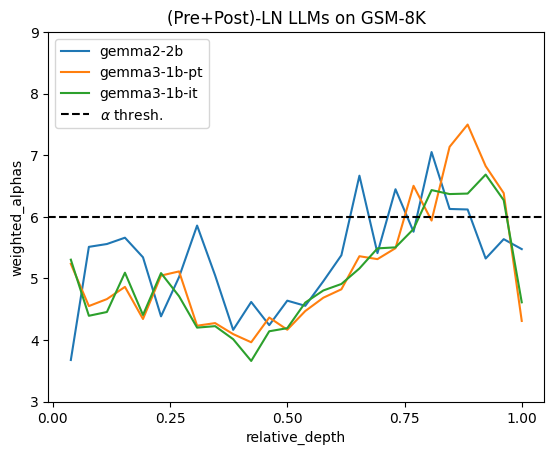

In [12]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'weighted_alphas'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.axhline(6.0, c="black", linestyle="--", label=r"$\alpha$ thresh.")
plt.legend()
plt.ylim([3, 9])
plt.title("Pre-LN LLMs on GSM-8K")
plt.show()

for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'weighted_alphas'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.axhline(6.0, c="black", linestyle="--", label=r"$\alpha$ thresh.")
plt.legend()
plt.ylim([3, 9])
plt.title("(Pre+Post)-LN LLMs on GSM-8K")
plt.show()

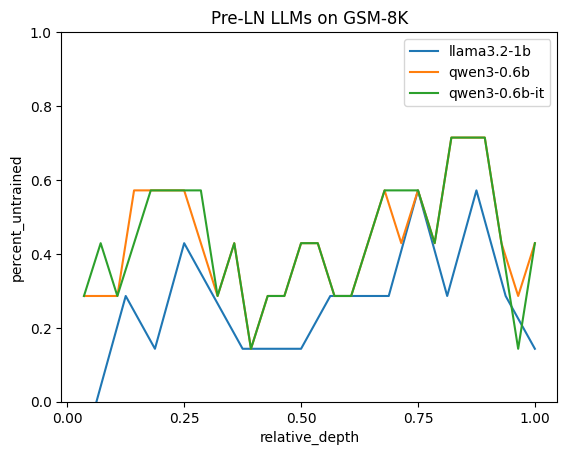

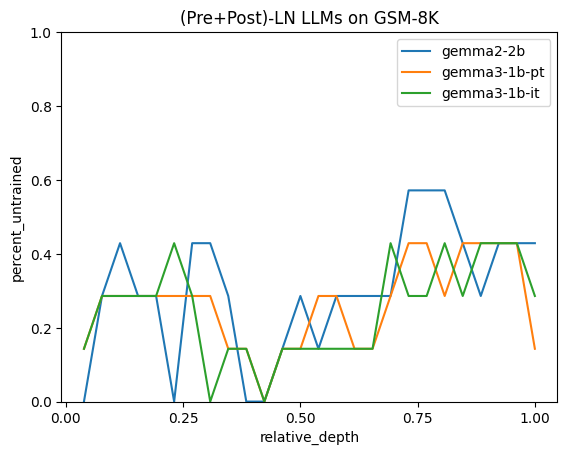

In [14]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'percent_untrained'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.legend()
plt.ylim([0, 1])
plt.title("Pre-LN LLMs on GSM-8K")
plt.show()

for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'percent_untrained'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.legend()
plt.ylim([0, 1])
plt.title("(Pre+Post)-LN LLMs on GSM-8K")
plt.show()

## input-output-cossim

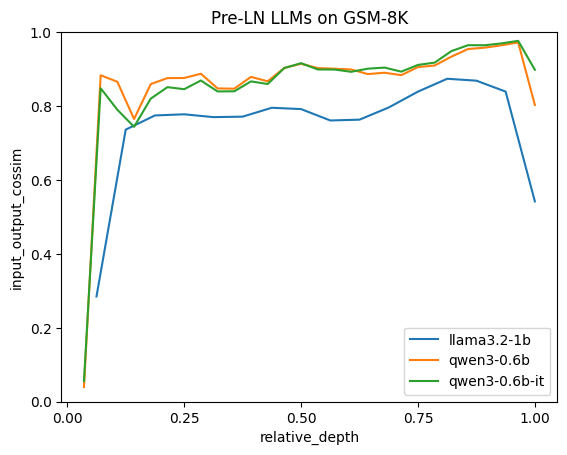

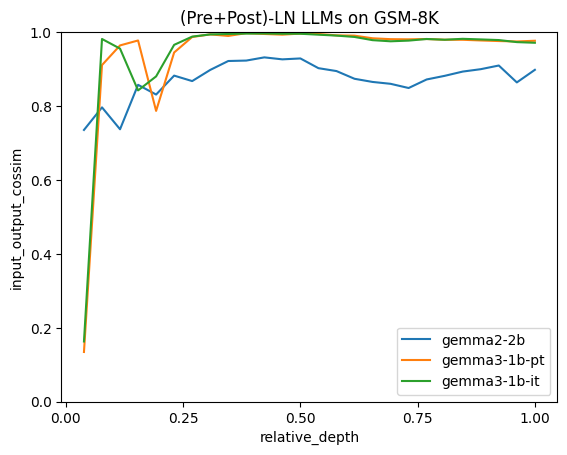

In [15]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'input_output_cossim'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.legend()
plt.ylim([0, 1])
plt.title("Pre-LN LLMs on GSM-8K")
plt.show()

for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'input_output_cossim'
    x = ww[name][xl]
    y = ww[name][yl]
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.legend()
plt.ylim([0, 1])
plt.title("(Pre+Post)-LN LLMs on GSM-8K")
plt.show()

## layer-skip-delta-perplexity

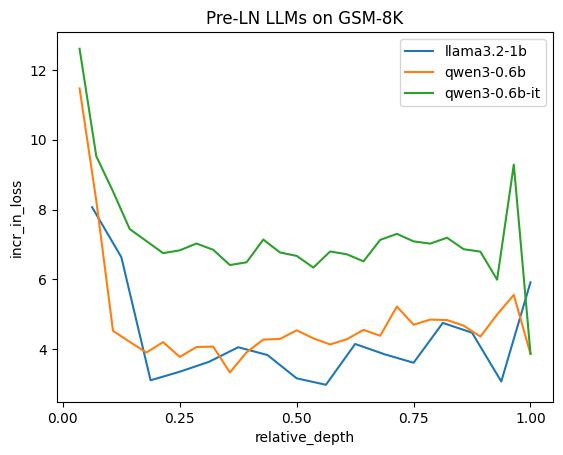

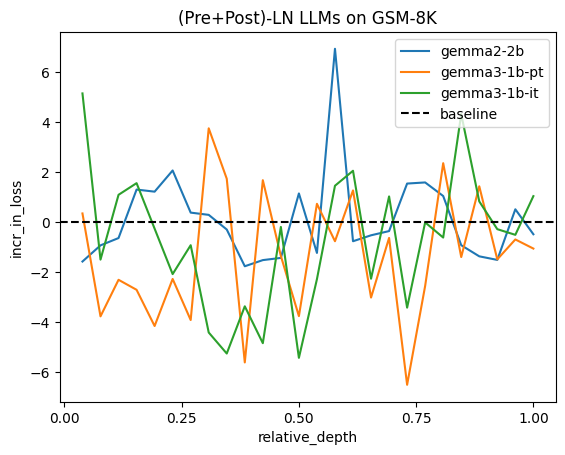

In [20]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    x = ppl[name][xl] #[3:]
    b = ppl[name]['base_perplexity']
    y = np.array([np.log(u)for u in ppl[name][yl]])
    y = y * 1
    
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('incr_in_loss')

    # plt.axhline(np.log(b), label=f"{name}-base")
plt.legend()
plt.title("Pre-LN LLMs on GSM-8K")
plt.show()

for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    x = ppl[name][xl]
    b = ppl[name]['base_perplexity']
    y = np.array([np.log(u) - np.log(b) for u in ppl[name][yl]])
    y = y * 1

    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('incr_in_loss')

plt.axhline(np.log(1), c="black", linestyle="--", label="baseline")
plt.title("(Pre+Post)-LN LLMs on GSM-8K")
plt.legend()
plt.show()

## grad-norms

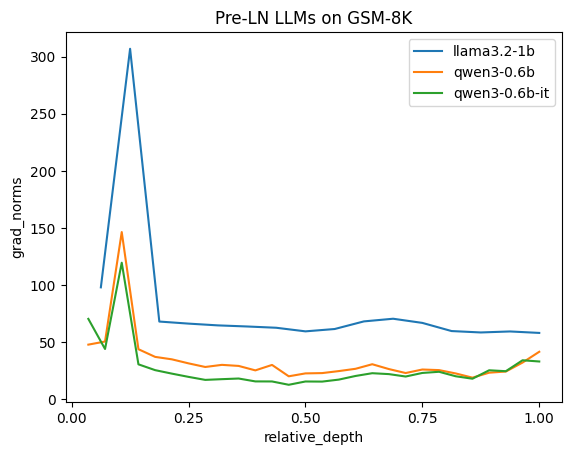

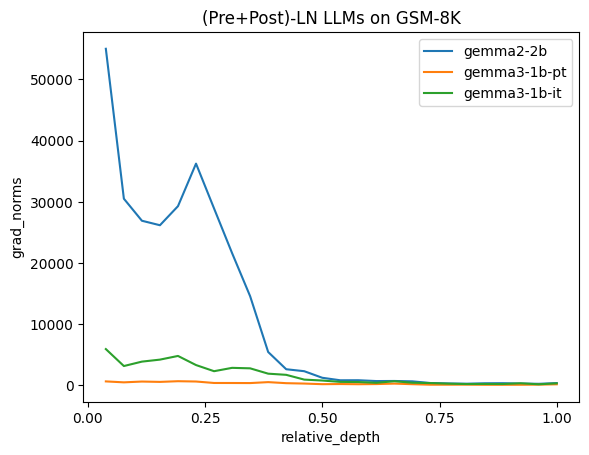

In [22]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'grad_norms'
    x = gn[name][xl]
    y = gn[name][yl] 
    
    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.legend()
plt.title("Pre-LN LLMs on GSM-8K")
plt.show()

for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'grad_norms'
    x = gn[name][xl]
    y = gn[name][yl]

    plt.plot(x, y, label=name)
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel(yl)

plt.title("(Pre+Post)-LN LLMs on GSM-8K")
plt.legend()
plt.show()

## can my metrics predict delta-perplexity

In [38]:
from scipy.stats import spearmanr
import dcor

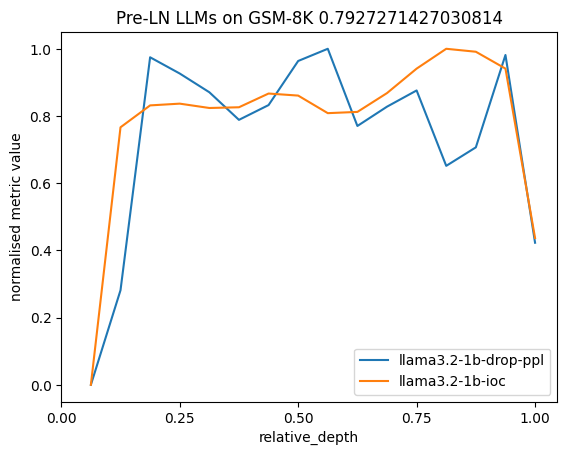

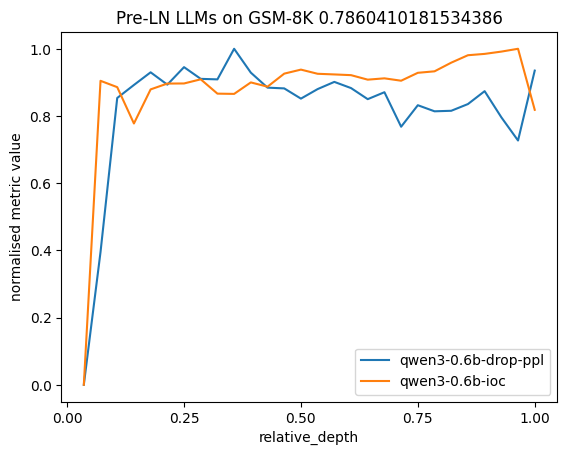

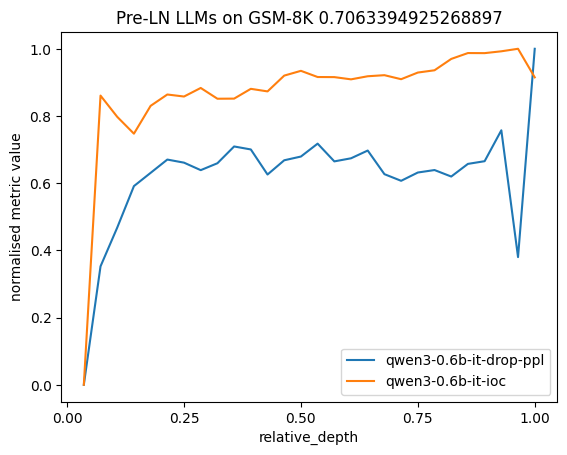

In [49]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    
    zl = 'input_output_cossim'
    
    x = ppl[name][xl] #[3:]
    y = -1 * np.array([np.log(u)for u in ppl[name][yl]])
    z = np.array(ww[name][zl])

    y = (y-y.min())/(y.max() - y.min())
    z = (z-z.min())/(z.max() - z.min())
    
    rho = dcor.distance_correlation(y, z)
    plt.plot(x, y, label=f"{name}-drop-ppl")
    plt.plot(x, z, label=f"{name}-ioc")
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('normalised metric value')

    plt.legend()
    plt.title(f"Pre-LN LLMs on GSM-8K {rho}")
    plt.show()

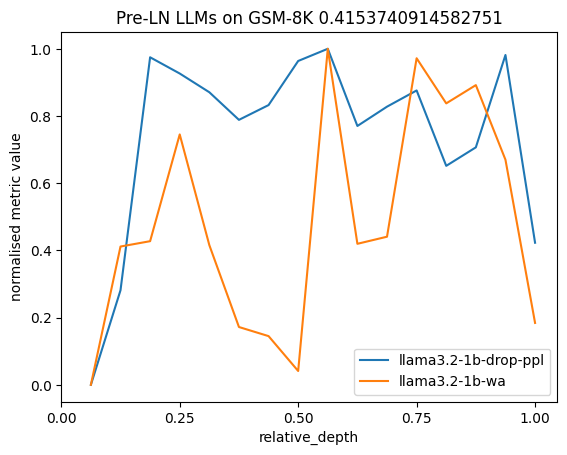

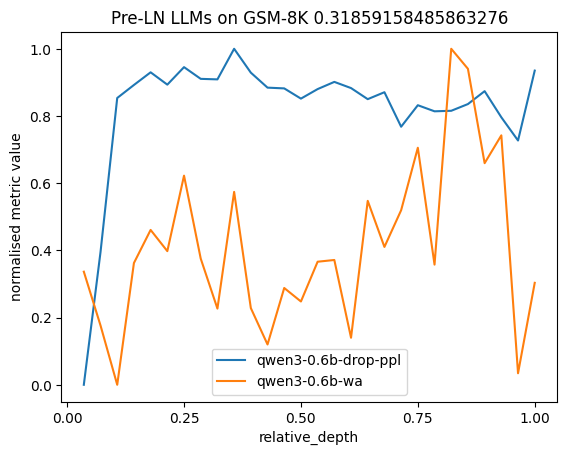

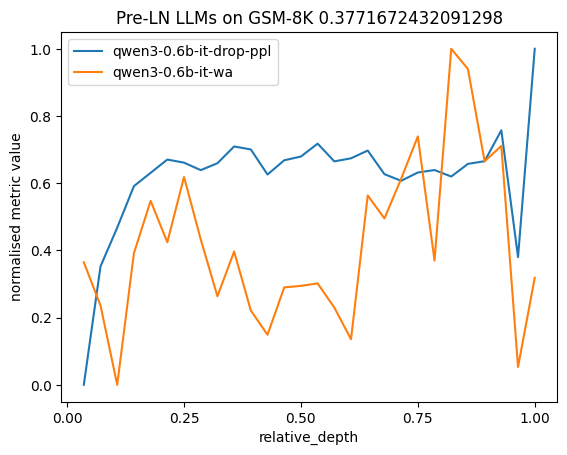

In [41]:
for name in ['llama3.2-1b', 'qwen3-0.6b', 'qwen3-0.6b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    
    zl = 'weighted_alphas'
    
    x = ppl[name][xl] #[3:]
    y = -1 * np.array([np.log(u)for u in ppl[name][yl]])
    z = np.array(ww[name][zl])

    y = (y-y.min())/(y.max() - y.min())
    z = (z-z.min())/(z.max() - z.min())
    
    plt.plot(x, y, label=f"{name}-drop-ppl")
    plt.plot(x, z, label=f"{name}-wa")
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('normalised metric value')

    plt.legend()
    # rho = spearmanr(y, z).statistic.item()
    rho = dcor.distance_correlation(y, z)
    plt.title(f"Pre-LN LLMs on GSM-8K {rho}")
    plt.show()

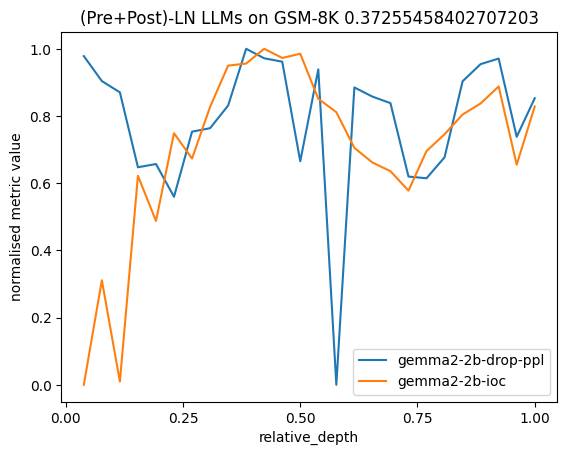

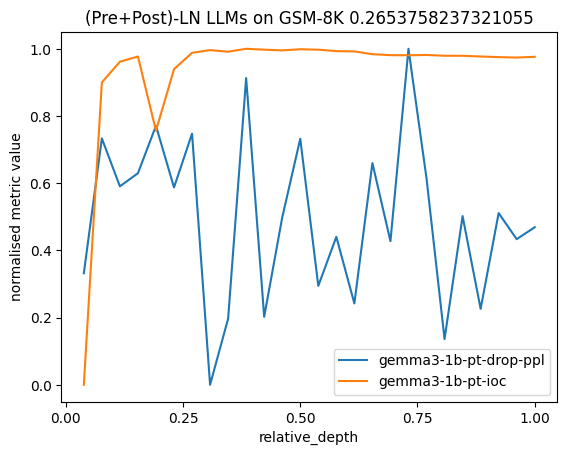

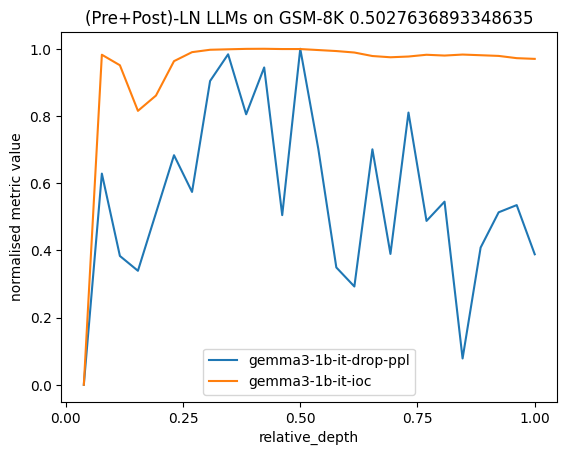

In [50]:
for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    
    zl = 'input_output_cossim'
    
    x = ppl[name][xl] #[3:]
    y = -1 * np.array([np.log(u)for u in ppl[name][yl]])
    z = np.array(ww[name][zl])

    y = (y-y.min())/(y.max() - y.min())
    z = (z-z.min())/(z.max() - z.min())
    
    plt.plot(x, y, label=f"{name}-drop-ppl")
    plt.plot(x, z, label=f"{name}-ioc")
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('normalised metric value')

    plt.legend()
    # rho = spearmanr(y, z).statistic.item()
    rho = dcor.distance_correlation(y, z)
    plt.title(f"(Pre+Post)-LN LLMs on GSM-8K {rho}")
    plt.show()

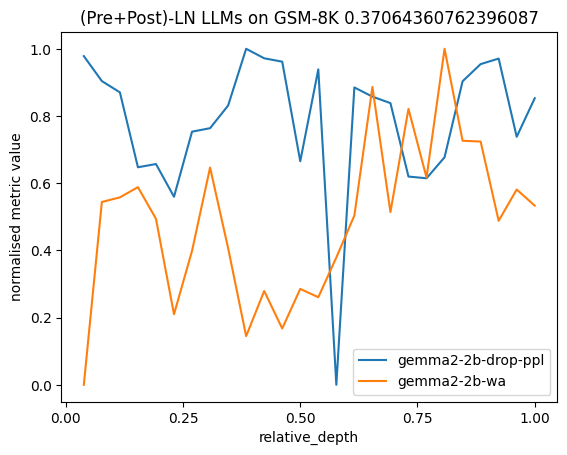

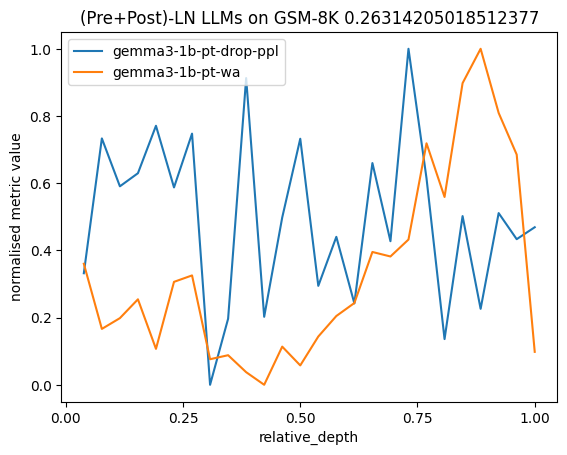

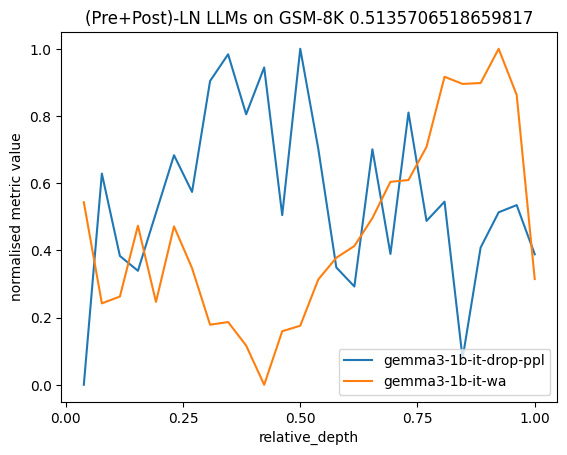

In [51]:
for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'drop_perplexities'
    
    zl = 'weighted_alphas'
    
    x = ppl[name][xl] #[3:]
    y = -1 * np.array([np.log(u)for u in ppl[name][yl]])
    z = np.array(ww[name][zl])

    y = (y-y.min())/(y.max() - y.min())
    z = (z-z.min())/(z.max() - z.min())
    
    plt.plot(x, y, label=f"{name}-drop-ppl")
    plt.plot(x, z, label=f"{name}-wa")
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('normalised metric value')

    plt.legend()
    # rho = spearmanr(y, z).statistic.item()
    rho = dcor.distance_correlation(y, z)
    plt.title(f"(Pre+Post)-LN LLMs on GSM-8K {rho}")
    plt.show()

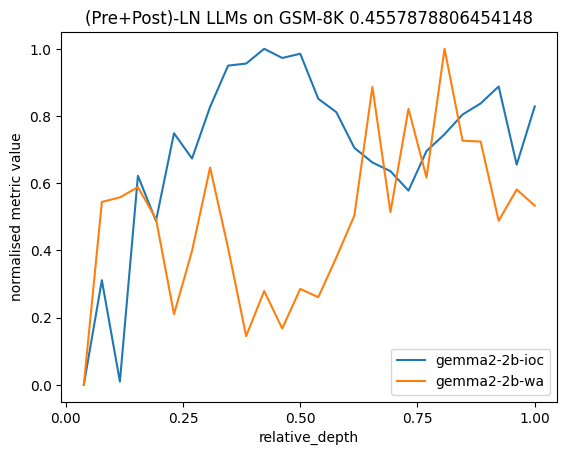

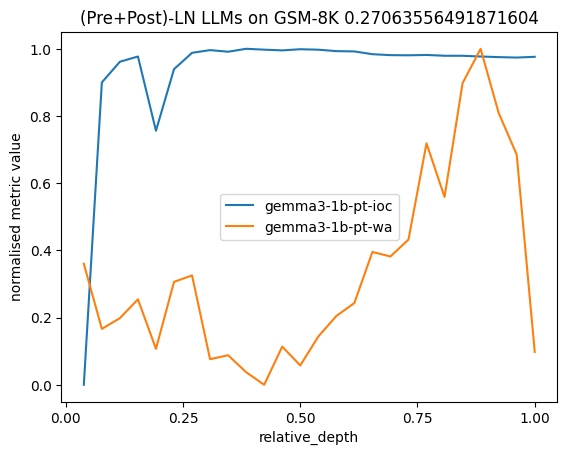

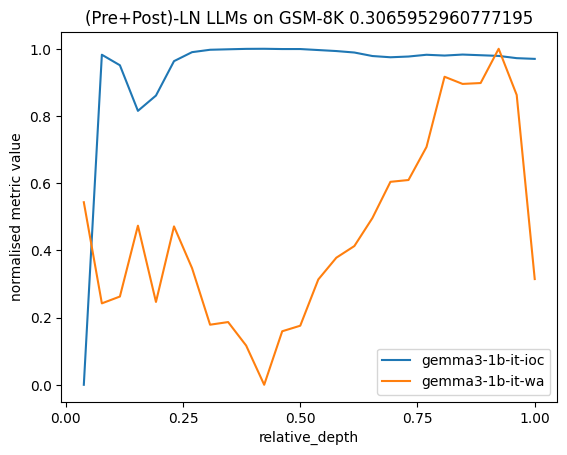

In [55]:
for name in ['gemma2-2b', 'gemma3-1b-pt', 'gemma3-1b-it']:
    xl = 'relative_depth'
    yl = 'input_output_cossim'
    
    zl = 'weighted_alphas'
    
    x = ppl[name][xl] #[3:]
    y = np.array([u for u in ww[name][yl]])
    z = np.array(ww[name][zl])

    y = (y-y.min())/(y.max() - y.min())
    z = (z-z.min())/(z.max() - z.min())
    
    plt.plot(x, y, label=f"{name}-ioc")
    plt.plot(x, z, label=f"{name}-wa")
    plt.xlabel(xl)
    plt.xticks([i/4 for i in range(5)])
    plt.ylabel('normalised metric value')

    plt.legend()
    # rho = spearmanr(y, z).statistic.item()
    rho = dcor.distance_correlation(y, z)
    plt.title(f"(Pre+Post)-LN LLMs on GSM-8K {rho}")
    plt.show()